In [25]:
import numpy as np
import pandas as pd

In [26]:
df=pd.read_csv('/astro/users/driemann/ml-aos/lightning_logs/version_3/metrics.csv')
df

,train_rmse,train_loss,epoch,step,val_rmse,val_loss
0,0.323412,0.129009,0,49,NaN,NaN
1,0.204197,0.051226,0,99,NaN,NaN
2,0.195088,0.044416,0,149,NaN,NaN
3,NaN,NaN,0,150,0.121847,0.017431
4,0.111316,0.015301,1,199,NaN,NaN
...,...,...,...,...,...,...
799,0.034002,0.001389,199,30049,NaN,NaN
800,0.029652,0.001149,199,30099,NaN,NaN
801,0.028737,0.001010,199,30149,NaN,NaN
802,0.028066,0.001009,199,30199,NaN,NaN


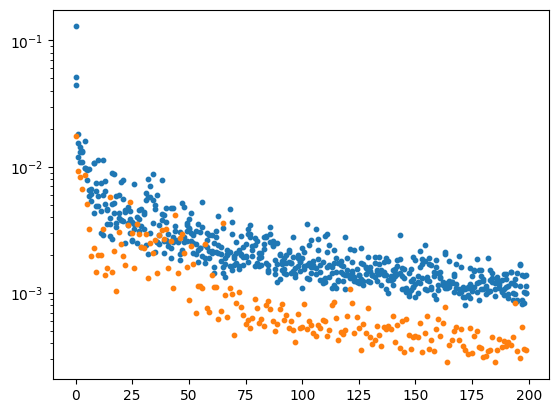

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['epoch'], df['train_loss'], s=10)
plt.scatter(df['epoch'], df['val_loss'], s=10)
plt.yscale('log')
plt.show()

In [28]:
from ml_aos.lightning import WaveNet
from ml_aos.dataloader import Donuts
model=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_3/checkpoints/epoch=185-step=28086.ckpt')
model.eval()

WaveNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 3

In [8]:
train=Donuts()
truth0=train[0]['dof']
truth0=truth0.numpy()
truth6=train[6]['dof'].numpy()

In [10]:
dof_pred0=model(train[0]['image'][None, ...], train[0]['intrafocal'][None, ...])
pred0=dof_pred0.detach().numpy().flatten()
dof_pred5=model(train[5]['image'][None, ...], train[5]['intrafocal'][None, ...])
pred6=model(train[6]['image'][None, ...], train[6]['intrafocal'][None, ...]).detach().numpy().flatten()

In [11]:
np.mean((pred0-truth0)**2)

0.00012993345

In [12]:
np.mean((pred5-truth5)**2)

NameError: name 'pred5' is not defined

In [29]:
losses = []
for i in range(5000):
    truth = train[i]['dof'].numpy()
    pred = model(train[i]['image'][None, ...], 
                  train[i]['intrafocal'][None, ...]).detach().numpy().flatten()
    losses.append(np.mean((pred-truth)**2))

losses = np.array(losses)

In [16]:
#idx = np.argsort(losses)[-7:]
idx= np.argsort(losses)[7:]
print(idx)

[3713  636 1010 ... 3796 1075 2419]


In [17]:
print(losses[idx])

[2.3513294e-06 2.5744964e-06 2.9109899e-06 ... 2.2493333e-03 2.5457039e-03
 2.6644587e-03]


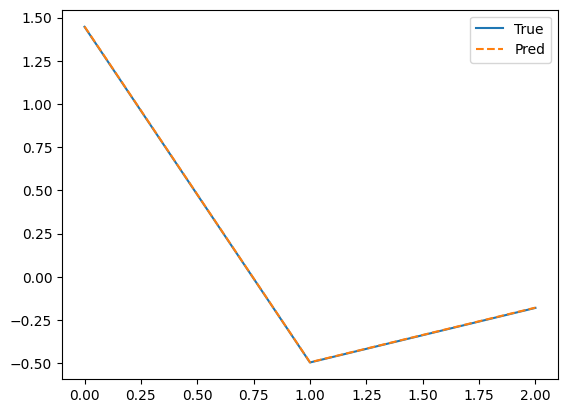

In [19]:
i=3713
plt.plot(train[i]['dof'].numpy(), label="True")
plt.plot(model(train[i]['image'][None, ...], train[i]['intrafocal'][None, ...]).detach().numpy().flatten(), ls='--', label='Pred')
plt.legend()

In [20]:
a=1000
truth = train[a]['dof'].numpy()
pred = model(train[a]['image'][None, ...], train[a]['intrafocal'][None, ...]).detach().numpy().flatten()

In [21]:
truth

array([-1.2642599 , -0.5923533 ,  0.08064713], dtype=float32)

In [22]:
pred

array([-1.2785156 , -0.575934  ,  0.08539715], dtype=float32)

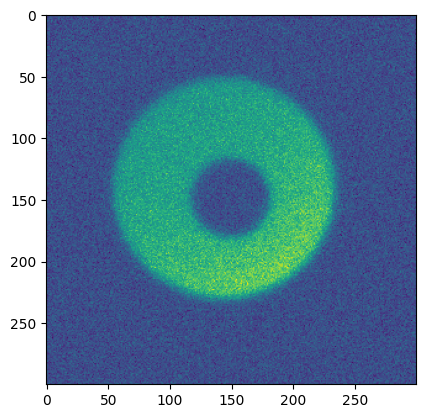

In [209]:
t_donut=np.load('/astro/users/driemann/auxtel_aos/test_data/t_donut1000.npz')
t_donut=t_donut['image']#[100:200, 100:200]
plt.imshow(t_donut)

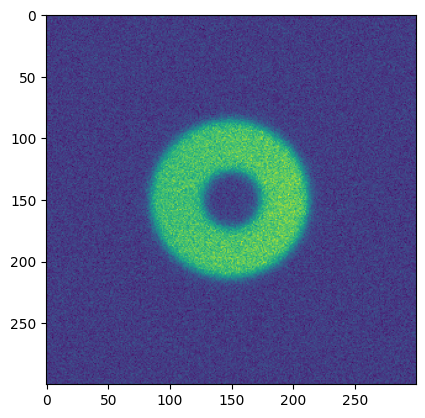

In [210]:
p_donut=np.load('/astro/users/driemann/auxtel_aos/test_data/p_donut1000.npz')
p_donut=p_donut['image'] #[100:200, 100:200]
plt.imshow(p_donut)

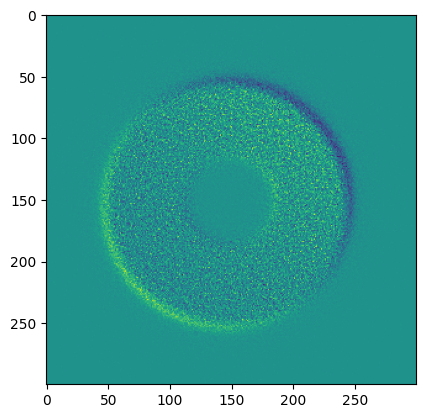

In [208]:
plt.imshow(t_donut - p_donut)